## Effect of social distancing on the spread of COVID-19

S: susceptible
E: exposed 
I: infected
R: recoved
N: number of population
S+E+I+R=N
dS/dt = -beta*S*I; beta:average contact rate
dE/dt = beta*S*I-alpha*E; alpha: incubation period
dI/dt = alpha*E-gama*I; gama: inverse of infection period
dR/dt = gama*I



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1
0.8
0.6
   time1  susceptible_rho1  exposed_rho_1  infected_rho_1  recoved_rho_1  \
0    0.0          0.999000       0.001000        0.000000       0.000000   
1    0.1          0.999000       0.000980        0.000020       0.000000   
2    0.2          0.998997       0.000964        0.000039       0.000001   
3    0.3          0.998990       0.000951        0.000056       0.000003   
4    0.4          0.998980       0.000942        0.000072       0.000006   

   time0.8  susceptible_rho0.8  exposed_rho_0.8  infected_rho_0.8  \
0      0.0            0.999000         0.001000          0.000000   
1      0.1            0.999000         0.000980          0.000020   
2      0.2            0.998997         0.000963          0.000039   
3      0.3            0.998992         0.000949          0.000056   
4      0.4            0.998984         0.000938          0.000072   

   recoved_rho_0.8  time0.6  susceptible_rho0.6  exposed_rho_0.6  \
0         0.000000      0.0            0.999000   

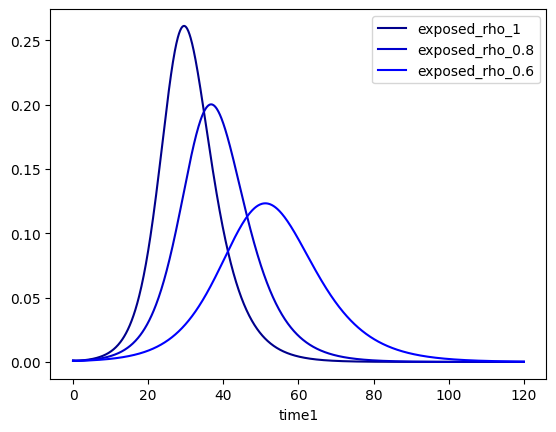

In [12]:
# Define parameters

# Maximum time, in days
t_max = 120

# time steps, in days
dt = 0.1
t = np.linspace(0, t_max, int(t_max/dt)+1)
# total population
N = 1000

# initial values of S, E, I, R
init_vals = 1-1/N, 1/N, 0, 0

alpha = 0.2
beta = 1.75
gamma = 0.5

params = alpha, beta, gamma

def seir_model_with_soc_dist(init_vals, paras, t, rho):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    dt = t[1]-t[0]
    for k in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return S, E, I, R, t

df = pd.DataFrame()

for rho in (1, 0.8, 0.6):
    print(rho)
    S, E, I, R, t = seir_model_with_soc_dist(init_vals, params, t, rho)
    df['time'+str(rho)] = t
    df['susceptible_rho'+str(rho)] = S
    df['exposed_rho_'+str(rho)] = E
    df['infected_rho_'+str(rho)] = I
    df['recoved_rho_'+str(rho)] = R
print(df.head())

df.plot('time1', y=['exposed_rho_1', 'exposed_rho_0.8', 'exposed_rho_0.6'],
       color=['darkblue', 'mediumblue', 'blue'])
plt.show()